<a href="https://colab.research.google.com/github/jeraldflowers/decision-tree-and-random-forest-fundamentals/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree con scikit-learn

In [1]:
#Import the main principals 
import pandas as pd
import matplotlib.pyplot as plt

We will use the **dataset Titanic** of Standford: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [3]:
#We load dataset to use
titanic = pd.read_csv('/content/titanic.csv', sep=",")

## Data Exploratory

In [4]:
#Visualization of the DataFrame
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
#We eliminate the columns that do not interest us
columns_to_drop = ['Name', 'Fare']
titanic.drop(columns_to_drop, axis="columns", inplace=True)

In [6]:
#Rename the columns
titanic.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [7]:
#Let's analize the shape of the object
print(titanic.shape)

(887, 6)


In [8]:
#Let's visualize the types of data
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [9]:
#Let's change the types of data 
titanic = pd.get_dummies(titanic, columns=['Sex'], drop_first=True)

In [10]:
titanic.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Sex_male      uint8
dtype: object

In [11]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [12]:
#Replace the DataFrame
titanic.rename(columns={'Sex_male': 'Sex'}, inplace=True)

In [13]:
#Sort columns by names
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


## Training of decision trees with scikit-learn

In [14]:
#Let's separate in X and y
X = titanic.drop('Survived', axis=1)
y = titanic.Survived

In [15]:
#Import the necessary libraries to the creation of the model
from sklearn.model_selection import train_test_split

#30% to test and 70% to train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=00000)

In [16]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Creation of the model
tree = DecisionTreeClassifier(max_depth=2, random_state=00000)

In [17]:
#Training
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## Model Test

In [18]:
#Calculation of the predictions in Train and Test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [19]:
#Calculation of metrics 
from sklearn.metrics import accuracy_score

#Calculation of accuracy in Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculation accuracy in Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print("The accuracy in train is:", train_accuracy)
print("The accuracy in test is:", test_accuracy)

The accuracy in train is: 0.8048387096774193
The accuracy in test is: 0.7640449438202247


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


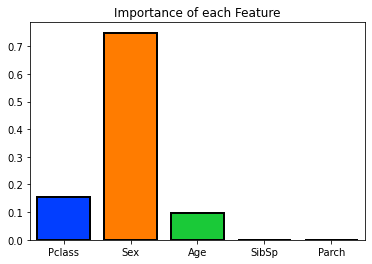

In [20]:
#Let's verify the feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title("Importance of each Feature")
plt.show()

**What can we take away from this example?**

We can see that to the model classification based on the target variable: Survived, the most important features are: Sex, followed by Pclass and after Age. It's Also is important to stand out that a similar performance is observed in the accuracy metric for the Train and Test data, which is clearly positive for our model. 